# Lab 8: Neural Network

In this lab, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

In [25]:
import tensorflow
import keras

## Lab 8. Part0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/#installation. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [26]:
import keras
keras.__version__

'2.3.1'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [27]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

In [28]:
train_images.shape

(60000, 28, 28)

#### Question 1: Could you explain what each number means?

**Answer 1:**

60,000 stands for the 60,000 images that are used for training purposes. The 28 by 28 number is the dimension for each of the images. So in short, it means that we have 60,000 training images and each image's pixels are represented as a 28 x 28 nested array.

Our workflow will be as follow: first we will present our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [29]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 2: Could you explain why we use 'relu' in first layer and 'softmax' in the second layer?

Relu function takes in a number. If that number is negative, then it returns zero but if that number is positive, then it returns exactly that number back. The reason we use 'relu' in the first layer is we do not want any negative output for the next Dense layer. Another reason is that it is very simple and therefore, computationally cheap. The cost of computing its gradient is relatively low since it's either 0 (if the input is zero) or 1 (if the input is positive). The reason the gradient would be 1 when the input is positive is the graph for RELU has a slope of 1 from 0 to positive infinity. 

Softmax function takes in a vector of input and outputs a vector of probabilities, in which each probability is associated correspondingly with an input element from the input vector. The probabilities in the output vector adds up to one. The reason we use softmax for the second layer is we need to categorize the inputs from the previous layer into final predictions. If we were to do this, we need to associate a probability for each category of 0-9 for each of the prediction from the previous layer. Then we choose the category with the highest probability.  

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [30]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 3: Could you explain why we use 'categorical_crossentropy'for loss function?

Categorical cross entropy is for measuring how a multi-class classification model perform. If the predicted probability for a category decreases, the loss score increases. The graph for a cross entropy function resembles that of a log loss function aka. -log(predicted_probability) (where - stands for negative)

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [31]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [32]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn them into vectors of 0s and 1s. We will do that with categorically encoding. Concretely, this means for instance turning the sequence [3, 5] into a 60,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones.

In [33]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 13s 225us/step - loss: 0.2561 - accuracy: 0.9262
Epoch 2/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.1036 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.0687 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 14s 232us/step - loss: 0.0496 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0373 - accuracy: 0.9886


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 146us/step


In [14]:
print('test_acc:', test_acc)

test_acc: 0.9757999777793884


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 

#### Question 4: What will be an example of overfiting here?

An example of overfitting here is if there images that looks like number 4 but its true training label are 9 and if we overfits it then when we run the model on the testing data, it would predict an actual 4 to be a 9. 

#### Question 5: Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

In [15]:
epochs_arr = [2, 3, 5]
batch_size_arr = [64, 128, 256]

for epoch in epochs_arr:
    for batch_size in batch_size_arr:
        network.fit(train_images, train_labels, epochs=epoch, batch_size=batch_size)
        test_loss, test_acc = network.evaluate(test_images, test_labels)
        print('For epoch: {} with batch_size: {}, we have test accuracy rate of: {}'.format(epoch, batch_size, test_acc))

Epoch 1/2
60000/60000 [==============================] - 23s 377us/step - loss: 0.0348 - accuracy: 0.9891
Epoch 2/2
10000/10000 [==============================] - 1s 98us/step
For epoch: 2 with batch_size: 64, we have test accuracy rate of: 0.9805999994277954
Epoch 1/2
60000/60000 [==============================] - 13s 210us/step - loss: 0.0167 - accuracy: 0.9954
Epoch 2/2
10000/10000 [==============================] - 1s 149us/step
For epoch: 2 with batch_size: 128, we have test accuracy rate of: 0.9804999828338623
Epoch 1/2
60000/60000 [==============================] - 8s 132us/step - loss: 0.0073 - accuracy: 0.9981
Epoch 2/2
10000/10000 [==============================] - 1s 149us/step
For epoch: 2 with batch_size: 256, we have test accuracy rate of: 0.9817000031471252
Epoch 1/3
60000/60000 [==============================] - 26s 438us/step - loss: 0.0079 - accuracy: 0.9975
Epoch 2/3
60000/60000 [==============================] - 30s 503us/step - loss: 0.0068 - accuracy: 0.9979
Epoch

This is the output of the above code: 

Epoch 1/2
60000/60000 [==============================] - 23s 377us/step - loss: 0.0348 - accuracy: 0.9891
Epoch 2/2
60000/60000 [==============================] - 23s 380us/step - loss: 0.0266 - accuracy: 0.9915
10000/10000 [==============================] - 1s 98us/step
For epoch: 2 with batch_size: 64, we have test accuracy rate of: 0.9805999994277954
Epoch 1/2
60000/60000 [==============================] - 13s 210us/step - loss: 0.0167 - accuracy: 0.9954
Epoch 2/2
60000/60000 [==============================] - 13s 209us/step - loss: 0.0129 - accuracy: 0.9965
10000/10000 [==============================] - 1s 149us/step
For epoch: 2 with batch_size: 128, we have test accuracy rate of: 0.9804999828338623
Epoch 1/2
60000/60000 [==============================] - 8s 132us/step - loss: 0.0073 - accuracy: 0.9981
Epoch 2/2
60000/60000 [==============================] - 9s 145us/step - loss: 0.0056 - accuracy: 0.9987
10000/10000 [==============================] - 1s 149us/step
For epoch: 2 with batch_size: 256, we have test accuracy rate of: 0.9817000031471252
Epoch 1/3
60000/60000 [==============================] - 26s 438us/step - loss: 0.0079 - accuracy: 0.9975
Epoch 2/3
60000/60000 [==============================] - 30s 503us/step - loss: 0.0068 - accuracy: 0.9979
Epoch 3/3
60000/60000 [==============================] - 28s 470us/step - loss: 0.0057 - accuracy: 0.9982
10000/10000 [==============================] - 1s 116us/step
For epoch: 3 with batch_size: 64, we have test accuracy rate of: 0.9812999963760376
Epoch 1/3
60000/60000 [==============================] - 13s 214us/step - loss: 0.0035 - accuracy: 0.9989
Epoch 2/3
60000/60000 [==============================] - 11s 177us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 3/3
60000/60000 [==============================] - 10s 174us/step - loss: 0.0019 - accuracy: 0.9995
10000/10000 [==============================] - 1s 90us/step
For epoch: 3 with batch_size: 128, we have test accuracy rate of: 0.9818000197410583
Epoch 1/3
60000/60000 [==============================] - 7s 118us/step - loss: 6.9406e-04 - accuracy: 0.9999
Epoch 2/3
60000/60000 [==============================] - 6s 104us/step - loss: 6.1422e-04 - accuracy: 0.9998
Epoch 3/3
60000/60000 [==============================] - 6s 106us/step - loss: 3.9121e-04 - accuracy: 0.9999
10000/10000 [==============================] - 1s 84us/step
For epoch: 3 with batch_size: 256, we have test accuracy rate of: 0.9821000099182129
Epoch 1/5
60000/60000 [==============================] - 19s 312us/step - loss: 0.0013 - accuracy: 0.9995
Epoch 2/5
60000/60000 [==============================] - 19s 310us/step - loss: 0.0012 - accuracy: 0.9997
Epoch 3/5
60000/60000 [==============================] - 27s 453us/step - loss: 0.0014 - accuracy: 0.9995
Epoch 4/5
60000/60000 [==============================] - 22s 364us/step - loss: 9.0375e-04 - accuracy: 0.9997
Epoch 5/5
60000/60000 [==============================] - 21s 350us/step - loss: 6.9439e-04 - accuracy: 0.9998
10000/10000 [==============================] - 1s 100us/step
For epoch: 5 with batch_size: 64, we have test accuracy rate of: 0.9822999835014343
Epoch 1/5
60000/60000 [==============================] - 12s 195us/step - loss: 5.1073e-04 - accuracy: 0.9998
Epoch 2/5
60000/60000 [==============================] - 11s 182us/step - loss: 1.5763e-04 - accuracy: 1.0000
Epoch 3/5
60000/60000 [==============================] - 10s 169us/step - loss: 2.1391e-04 - accuracy: 0.9999
Epoch 4/5
60000/60000 [==============================] - 10s 173us/step - loss: 1.5582e-04 - accuracy: 0.9999
Epoch 5/5
60000/60000 [==============================] - 10s 172us/step - loss: 1.1782e-04 - accuracy: 1.0000
10000/10000 [==============================] - 1s 105us/step
For epoch: 5 with batch_size: 128, we have test accuracy rate of: 0.9812999963760376
Epoch 1/5
60000/60000 [==============================] - 6s 108us/step - loss: 3.8694e-05 - accuracy: 1.0000
Epoch 2/5
60000/60000 [==============================] - 7s 116us/step - loss: 2.5627e-05 - accuracy: 1.0000
Epoch 3/5
60000/60000 [==============================] - 6s 103us/step - loss: 5.3875e-05 - accuracy: 1.0000
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 6.9123e-06 - accuracy: 1.0000
Epoch 5/5
60000/60000 [==============================] - 7s 114us/step - loss: 9.3506e-06 - accuracy: 1.0000
10000/10000 [==============================] - 1s 127us/step
For epoch: 5 with batch_size: 256, we have test accuracy rate of: 0.9822999835014343

As we can observe, as we increase the number of epoch and batch size, our accuracy rate tends to go up. 

This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Lab 8, Part 1:   Convolutional Neural Networks (CNN) 

In this Part1, we will learn how to train CNNs. All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [34]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

The following block selects a subset of images from the MNIST data.

In [35]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 20000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [36]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [37]:
# -- Initializing the values for the convolution neural network

nb_epoch = 2  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [38]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 386
Trainable params: 386
Non-trainable params: 0
________________________________________________________

**Question 1.** From the above summary, can you explain the architecture of this CNN?

**Answer 1**

A pretty good introductory article on CNN. https://heartbeat.fritz.ai/a-beginners-guide-to-convolutional-neural-networks-cnn-cf26c5ee17ed

This CNN has a total of 6 layer. 

The first layer is a convolutional 2D layer. From this video (https://www.youtube.com/watch?v=YRhxdVk_sIs), a convolutional layer is very popular in processing images. It takes in an image and apply a filter on that image using a technique called convolution. Convolution describes the sliding movement of a filter so that the filter is being applied across all pixels of an image. The purpose of this layer is to sharpen the images. 

The second layer uses RELU activation function. I think this is to make sure any pixel that equates to a negative value get turn into zero. After reading some online sources (especially this one: https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/), I've realized that it is conventional to apply RELU after every convolutional layer because the purpose of this is to introduce non-linearity into the inputs. Please note that these inputs are outputs from the previous convolutional layer and these outputs were the outputs of the dot product and we know dot products are linear operations. 

The third layer uses 2d max pooling layer. How this works is that it takes a filter of some dimension and convolve it. For every sub-region that the filter convolves, it returns the maximum number of that sub-region onto some sort of an output. This output obviously would be smaller than the input. Since it is smaller, we called this a down-sampling layer.

The fourth layer uses the flattening function. What this function does is that it converts the output feature map from the third layer into a single column or a vector. This is similar to flatten function that Python uses.

The fifth layer creates another dense layer with nb_classes, which basically converts the one-hot encoding of every prediction into the normal category like from 0-9. 

The last layer uses softmax activation function. The softmax function is to give a predicted probability for every image for each of the category. 

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [23]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 8s 311us/step - loss: 0.3575 - accuracy: 0.8659 - val_loss: 0.2648 - val_accuracy: 0.9052
Epoch 2/2
26265/26265 [==============================] - 7s 281us/step - loss: 0.2534 - accuracy: 0.9100 - val_loss: 0.2261 - val_accuracy: 0.9171


Let us plot the accuracy. 

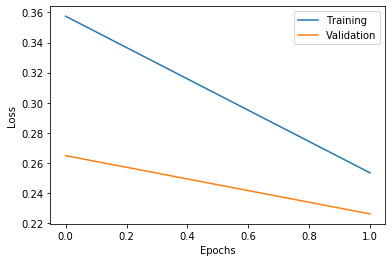

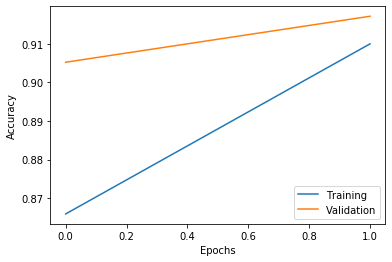

In [24]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

# got some error so I added this
# https://github.com/dmlc/xgboost/issues/1715
os.environ['KMP_DUPLICATE_LIB_OK']='True'

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [25]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.22607038581371308
Test Accuracy: 0.9171000123023987


Let us visualize our model Predictions!

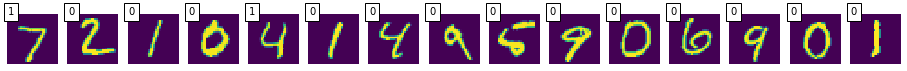

In [27]:
sliced = 15
predicted = model.predict(X_test[:sliced]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(sliced):
    plt.subplot(1, sliced, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

**Question 2.** Can you discuss the performance of the CNN model? What kind of errors is it making?

**Answer 2:**

The CNN model's test accuracy rate on test data is 91.7%, which is very high when taken into consideration that the test data's size is 10,000 images. I also looked at the loss score, which is 0.226 and the way that this score was calculated was using the idea of categorical cross-entropy, which penalizes (aka. gives a higher score) if the model's predicted probabilities for each observation is farther away from the true probability. It is not surprising that the loss score is relatively low when we have already seen that the test accuracy rate is very high. 

From the above visualization, it looks like the model is not seeing a big difference between number 7 and 4 but this is just 15 examples from the set data. There could be other errors that it is making. 

The kind of general errors that this model is making is probably confusing images that might look like a 4 but is actually classified as a 9. Another possibility might be the confusion between the number 7 and number 1. So the errors might be relating to confusing numbers that might have similar hand-written pattern so for example, the probability of the model confusing between 0 and 7 are relatively low since these 2 numbers have very different hand-written structure. 

**Question 3.** Run the training for 10 epochs. How did it impact the accuracy?

In [16]:
# All the code are copied from above
# only with the epoch changed from 2 to 10

nb_epoch = 10  # kept very low! Please increase if you have GPU

batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Adding Layers
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Almost forgot this critical step
# This is unncessary to observe how the model perform after every successive epoch (epoch = the number of passes
# that a model must go through)
# Fitting the model
model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 8s 321us/step - loss: 0.3595 - accuracy: 0.8656 - val_loss: 0.2077 - val_accuracy: 0.9358
Epoch 2/10
26265/26265 [==============================] - 8s 301us/step - loss: 0.2477 - accuracy: 0.9111 - val_loss: 0.1270 - val_accuracy: 0.9612
Epoch 3/10
26265/26265 [==============================] - 9s 359us/step - loss: 0.2161 - accuracy: 0.9234 - val_loss: 0.1026 - val_accuracy: 0.9655
Epoch 4/10
26265/26265 [==============================] - 8s 309us/step - loss: 0.1997 - accuracy: 0.9277 - val_loss: 0.0958 - val_accuracy: 0.9692
Epoch 5/10
26265/26265 [==============================] - 9s 349us/step - loss: 0.1902 - accuracy: 0.9325 - val_loss: 0.1028 - val_accuracy: 0.9687
Epoch 6/10
26265/26265 [==============================] - 9s 324us/step - loss: 0.1871 - accuracy: 0.9314 - val_loss: 0.0949 - val_accuracy: 0.9693
Epoch 7/10
26265/26265 [==============================] - 7s 2

From observing the result, by increasing the number of epoch from 2 to 10, our accuracy rate on test data improved from 91.7% to 96.4%, which is an almost 5% improvement. 

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture.

In [17]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 27s 1ms/step - loss: 0.1858 - accuracy: 0.9331 - val_loss: 0.0777 - val_accuracy: 0.9779
Epoch 2/10
26265/26265 [==============================] - 22s 850us/step - loss: 0.0940 - accuracy: 0.9676 - val_loss: 0.0687 - val_accuracy: 0.9791
Epoch 3/10
26265/26265 [==============================] - 23s 864us/step - loss: 0.0836 - accuracy: 0.9720 - val_loss: 0.0861 - val_accuracy: 0.9715
Epoch 4/10
26265/26265 [==============================] - 22s 819us/step - loss: 0.0773 - accuracy: 0.9743 - val_loss: 0.0540 - val_accuracy: 0.9829
Epoch 5/10
26265/26265 [==============================] - 20s 775us/step - loss: 0.0724 - accuracy: 0.9758 - val_loss: 0.0642 - val_accuracy: 0.9793
Epoch 6/10
26265/26265 [==============================] - 23s 857us/step - loss: 0.0685 - accuracy: 0.9772 - val_loss: 0.0514 - val_accuracy: 0.9840
Epoch 7/10
26265/26265 [==============================] - 

In [20]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.040330443998426196
Test accuracy: 0.9872999787330627


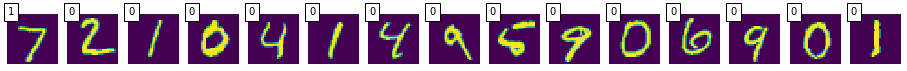

In [24]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

# got some error so I added this
# https://github.com/dmlc/xgboost/issues/1715
os.environ['KMP_DUPLICATE_LIB_OK']='True'

sliced = 15
predicted = model.predict(X_test[:sliced]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(sliced):
    plt.subplot(1, sliced, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

**Question 4.** Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

Layer 1 - 4 are pretty similar in terms of functionality and the number of attributes. However, for layer 2, the first model has the output shape of (None, 26, 26, 32) while the second model has the output shape of (None, 13, 13, 32).

For layer 3, the first model’s output shape is (None, 1, 1, 32) and the second model’s output shape is (13, 13, 32).

For layer 4, the first model’s output shape is (None, 32) and the second model’s output shape is (None, 5408).

Layer 5 both has the dense layer as well but the first model has the output shape of (None, 2) with 66 parameters while the second model has the output shape of (None, 128) with a huge 692,352 parameters. 

Layer 6 both has activation functions. The first model uses softmax to puts the predicted probability for each class so it ends here. The second model uses RELU.

Layer 7 and 8 only existed for the second model. The second model has a dense layer for layer 7 and softmax activation layer for layer 8. 

When I look at the visualization for both models, it looks like the second model performs better because it sees the distinctions between 7 and 4 much better. 

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [41]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [42]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 25s 939us/step - loss: 0.2563 - accuracy: 0.8955 - val_loss: 0.0967 - val_accuracy: 0.9739
Epoch 2/2
26265/26265 [==============================] - 22s 823us/step - loss: 0.1055 - accuracy: 0.9634 - val_loss: 0.0691 - val_accuracy: 0.9785


In [44]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.06910419550687075
Test accuracy: 0.9785000085830688


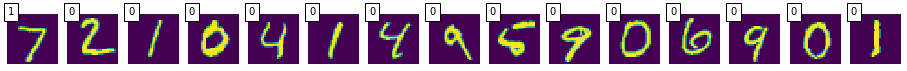

In [45]:
sliced = 15
predicted = model.predict(X_test[:sliced]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(sliced):
    plt.subplot(1, sliced, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

Another 0.2 % lift from 97.8% to 98.0%. This model sees clearly "9" is different than "7"! 

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments.


In [46]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    slice = 15
    predicted = model.predict(X_test[:slice]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(slice):
        plt.subplot(1, slice, i+1)
        plt.imshow(X_test_orig[i], interpolation='nearest')
        plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

An example of running this function

Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 45s 2ms/step - loss: 0.2489 - accuracy: 0.9034 - val_loss: 0.0925 - val_accuracy: 0.9770
Epoch 2/2
26265/26265 [==============================] - 55s 2ms/step - loss: 0.1291 - accuracy: 0.9556 - val_loss: 0.0738 - val_accuracy: 0.9793
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.0738212803453207
Test accuracy: 0.9793000221252441


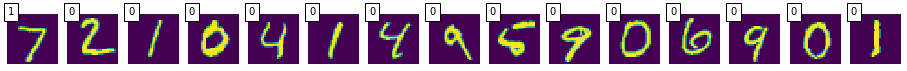

In [47]:
# Here is an example of running build_model() with default hyperparameters
build_model()

Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 67s 3ms/step - loss: 0.3143 - accuracy: 0.8618 - val_loss: 0.0789 - val_accuracy: 0.9739
Epoch 2/2
26265/26265 [==============================] - 68s 3ms/step - loss: 0.1080 - accuracy: 0.9623 - val_loss: 0.0666 - val_accuracy: 0.9790
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.06655227663069964
Test accuracy: 0.9789999723434448


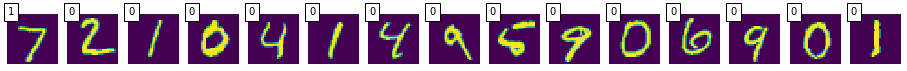

In [48]:
# Here is an example of running build_model() with new hyperparameters
build_model(num_conv = 3, num_dense = 3)

Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 43s 2ms/step - loss: 0.2131 - accuracy: 0.9222 - val_loss: 0.0870 - val_accuracy: 0.9770
Epoch 2/2
26265/26265 [==============================] - 50s 2ms/step - loss: 0.1210 - accuracy: 0.9597 - val_loss: 0.0729 - val_accuracy: 0.9785
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.07294186255186796
Test accuracy: 0.9785000085830688
1min 37s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


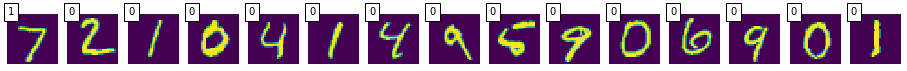

In [49]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

**Question 5.** Try to change some of the **hyperparameters** without exploding the computational resources on your computer. 
What is the best accuracy you can get? How many parameters are there of each model? How long does the training take?

---------------
Parameter num_conv : 1, conv_acitvation : relu, dense_activation : relu, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 54s 2ms/step - loss: 0.2357 - accuracy: 0.9111 - val_loss: 0.0912 - val_accuracy: 0.9773
Epoch 2/2
26265/26265 [==============================] - 43s 2ms/step - loss: 0.1220 - accuracy: 0.9577 - val_loss: 0.0740 - val_accuracy: 0.9790
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.07399130616113543
Test accuracy: 0.9789999723434448
1min 41s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : relu, dense_activation : relu, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 54s 2ms/step - loss: 0.2198 - accuracy: 0.9156 - val_loss: 0.0745 - val_accuracy: 0.9782
Epoch 2/2
26265/26265 [================

26265/26265 [==============================] - 76s 3ms/step - loss: 0.2379 - accuracy: 0.9124 - val_loss: 0.0958 - val_accuracy: 0.9775
Epoch 2/2
26265/26265 [==============================] - 73s 3ms/step - loss: 0.1245 - accuracy: 0.9590 - val_loss: 0.0820 - val_accuracy: 0.9786
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.08201296349465848
Test accuracy: 0.978600025177002
2min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : tanh, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 75s 3ms/step - loss: 0.1916 - accuracy: 0.9328 - val_loss: 0.0793 - val_accuracy: 0.9791
Epoch 2/2
26265/26265 [==============================] - 70s 3ms/step - loss: 0.1118 - accuracy: 0.9618 - val_loss: 0.0697 - val_accuracy: 0.9800
1 convolutional layers, 2 dense layers
With max pooling
W

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 79s 3ms/step - loss: 1.4431 - accuracy: 0.6616 - val_loss: 2.2767 - val_accuracy: 0.1028
Epoch 2/2
26265/26265 [==============================] - 69s 3ms/step - loss: 0.8969 - accuracy: 0.7321 - val_loss: 0.2328 - val_accuracy: 0.8983
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.2328257042363286
Test accuracy: 0.8982999920845032


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 78s 3ms/step - loss: 0.5817 - accuracy: 0.7517 - val_loss: 0.3557 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 78s 3ms/step - loss: 0.5496 - accuracy: 0.7614 - val_loss: 0.4011 - val_accuracy: 0.8972
1 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.40114813723564147
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 80s 3ms/step - loss: 0.5611 - accuracy: 0.7576 - val_loss: 0.4478 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 78s 3ms/step - loss: 0.5472 - accuracy: 0.7614 - val_loss: 0.3588 - val_accuracy: 0.8972
1 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.35884905905723574
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 56s 2ms/step - loss: 1.4205 - accuracy: 0.6536 - val_loss: 1.1324 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 58s 2ms/step - loss: 1.0361 - accuracy: 0.7114 - val_loss: 0.2263 - val_accuracy: 0.9532
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.22633322291374205
Test accuracy: 0.9531999826431274


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 72s 3ms/step - loss: 0.5617 - accuracy: 0.7595 - val_loss: 0.3601 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 66s 3ms/step - loss: 0.5487 - accuracy: 0.7612 - val_loss: 0.3981 - val_accuracy: 0.8972
1 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.3981078067779541
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 1, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 62s 2ms/step - loss: 0.5520 - accuracy: 0.7596 - val_loss: 0.3860 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.5497 - accuracy: 0.7615 - val_loss: 0.4123 - val_accuracy: 0.8972
1 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.41229104890823365
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 8s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : relu, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 53s 2ms/step - loss: 0.2490 - accuracy: 0.8975 - val_loss: 0.0914 - val_accuracy: 0.9743
Epoch 2/2
26265/26265 [==============================] - 56s 2ms/step - loss: 0.1175 - accuracy: 0.9586 - val_loss: 0.0762 - val_accuracy: 0.9785
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.07618101735264063
Test accuracy: 0.9785000085830688


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : relu, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 57s 2ms/step - loss: 0.2401 - accuracy: 0.9011 - val_loss: 0.0699 - val_accuracy: 0.9801
Epoch 2/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.1203 - accuracy: 0.9575 - val_loss: 0.0648 - val_accuracy: 0.9800
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.06484770792350172
Test accuracy: 0.9800000190734863


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : relu, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 60s 2ms/step - loss: 0.2523 - accuracy: 0.8927 - val_loss: 0.0780 - val_accuracy: 0.9752
Epoch 2/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.1171 - accuracy: 0.9588 - val_loss: 0.0615 - val_accuracy: 0.9811
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.06146661962233484
Test accuracy: 0.9811000227928162


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : tanh, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 56s 2ms/step - loss: 0.2393 - accuracy: 0.9015 - val_loss: 0.0851 - val_accuracy: 0.9758
Epoch 2/2
26265/26265 [==============================] - 53s 2ms/step - loss: 0.1212 - accuracy: 0.9558 - val_loss: 0.0805 - val_accuracy: 0.9762
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.0804916680380702
Test accuracy: 0.9761999845504761


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.2159 - accuracy: 0.9130 - val_loss: 0.0717 - val_accuracy: 0.9777
Epoch 2/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.1141 - accuracy: 0.9600 - val_loss: 0.0603 - val_accuracy: 0.9805
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.06027427438721061
Test accuracy: 0.9804999828338623


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : tanh, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.1886 - accuracy: 0.9272 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 2/2
26265/26265 [==============================] - 58s 2ms/step - loss: 0.1041 - accuracy: 0.9636 - val_loss: 0.0542 - val_accuracy: 0.9826
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.054197686422243714
Test accuracy: 0.9825999736785889


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : sigmoid, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 55s 2ms/step - loss: 0.2249 - accuracy: 0.9078 - val_loss: 0.0752 - val_accuracy: 0.9794
Epoch 2/2
26265/26265 [==============================] - 53s 2ms/step - loss: 0.1196 - accuracy: 0.9558 - val_loss: 0.0831 - val_accuracy: 0.9743
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.08308567260056735
Test accuracy: 0.9743000268936157


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1min 55s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : sigmoid, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.3764 - accuracy: 0.8316 - val_loss: 0.1186 - val_accuracy: 0.9735
Epoch 2/2
26265/26265 [==============================] - 58s 2ms/step - loss: 0.1412 - accuracy: 0.9529 - val_loss: 0.0771 - val_accuracy: 0.9759
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.07712247399017215
Test accuracy: 0.9758999943733215


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : relu, dense_activation : sigmoid, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 59s 2ms/step - loss: 0.5515 - accuracy: 0.7554 - val_loss: 0.3748 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 57s 2ms/step - loss: 0.5238 - accuracy: 0.7615 - val_loss: 0.3629 - val_accuracy: 0.8972
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.36287094831466676
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : relu, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 87s 3ms/step - loss: 0.2010 - accuracy: 0.9274 - val_loss: 0.0792 - val_accuracy: 0.9793
Epoch 2/2
26265/26265 [==============================] - 82s 3ms/step - loss: 0.1120 - accuracy: 0.9619 - val_loss: 0.0685 - val_accuracy: 0.9803
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.06845485728606582
Test accuracy: 0.9803000092506409


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : relu, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 96s 4ms/step - loss: 0.2011 - accuracy: 0.9211 - val_loss: 0.0718 - val_accuracy: 0.9784
Epoch 2/2
26265/26265 [==============================] - 99s 4ms/step - loss: 0.1039 - accuracy: 0.9638 - val_loss: 0.0584 - val_accuracy: 0.9818
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.05844225544705987
Test accuracy: 0.9818000197410583


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : relu, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 80s 3ms/step - loss: 0.2581 - accuracy: 0.8918 - val_loss: 0.0875 - val_accuracy: 0.9707
Epoch 2/2
26265/26265 [==============================] - 82s 3ms/step - loss: 0.1094 - accuracy: 0.9615 - val_loss: 0.0729 - val_accuracy: 0.9761
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.07292834642827511
Test accuracy: 0.9761000275611877


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : tanh, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 79s 3ms/step - loss: 0.2027 - accuracy: 0.9253 - val_loss: 0.0797 - val_accuracy: 0.9785
Epoch 2/2
26265/26265 [==============================] - 82s 3ms/step - loss: 0.1112 - accuracy: 0.9619 - val_loss: 0.0701 - val_accuracy: 0.9800
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.07007172081917525
Test accuracy: 0.9800000190734863


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 52s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 80s 3ms/step - loss: 0.1833 - accuracy: 0.9348 - val_loss: 0.0791 - val_accuracy: 0.9775
Epoch 2/2
26265/26265 [==============================] - 83s 3ms/step - loss: 0.1044 - accuracy: 0.9646 - val_loss: 0.0635 - val_accuracy: 0.9803
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.06349523794166743
Test accuracy: 0.9803000092506409


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : tanh, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 87s 3ms/step - loss: 0.1751 - accuracy: 0.9344 - val_loss: 0.0855 - val_accuracy: 0.9733
Epoch 2/2
26265/26265 [==============================] - 82s 3ms/step - loss: 0.1008 - accuracy: 0.9655 - val_loss: 0.0594 - val_accuracy: 0.9809
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.05943494141697884
Test accuracy: 0.98089998960495


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : sigmoid, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 86s 3ms/step - loss: 0.2060 - accuracy: 0.9232 - val_loss: 0.0750 - val_accuracy: 0.9791
Epoch 2/2
26265/26265 [==============================] - 78s 3ms/step - loss: 0.1101 - accuracy: 0.9622 - val_loss: 0.0717 - val_accuracy: 0.9797
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.07169408136606216
Test accuracy: 0.9797000288963318


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : sigmoid, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 83s 3ms/step - loss: 0.3615 - accuracy: 0.8418 - val_loss: 0.1387 - val_accuracy: 0.9737
Epoch 2/2
26265/26265 [==============================] - 86s 3ms/step - loss: 0.1435 - accuracy: 0.9563 - val_loss: 0.0901 - val_accuracy: 0.9744
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.09009423024952412
Test accuracy: 0.974399983882904


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : tanh, dense_activation : sigmoid, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 85s 3ms/step - loss: 0.5417 - accuracy: 0.7600 - val_loss: 0.4009 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 85s 3ms/step - loss: 0.4972 - accuracy: 0.7615 - val_loss: 0.3181 - val_accuracy: 0.8972
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.3180783362865448
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : relu, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 80s 3ms/step - loss: 0.7023 - accuracy: 0.7193 - val_loss: 0.3304 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 74s 3ms/step - loss: 0.5673 - accuracy: 0.7580 - val_loss: 0.3476 - val_accuracy: 0.8972
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.3475730755329132
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 45s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : relu, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 82s 3ms/step - loss: 0.5690 - accuracy: 0.7568 - val_loss: 0.4282 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 78s 3ms/step - loss: 0.5547 - accuracy: 0.7615 - val_loss: 0.3901 - val_accuracy: 0.8972
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.3900899017333984
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 51s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : relu, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 80s 3ms/step - loss: 0.5660 - accuracy: 0.7583 - val_loss: 0.4006 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 84s 3ms/step - loss: 0.5553 - accuracy: 0.7614 - val_loss: 0.4319 - val_accuracy: 0.8972
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.43191545357704164
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 76s 3ms/step - loss: 0.6804 - accuracy: 0.7211 - val_loss: 0.3640 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 75s 3ms/step - loss: 0.5660 - accuracy: 0.7582 - val_loss: 0.3795 - val_accuracy: 0.8972
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.3795006911277771
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 42s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 79s 3ms/step - loss: 0.5856 - accuracy: 0.7503 - val_loss: 0.3467 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 77s 3ms/step - loss: 0.5547 - accuracy: 0.7614 - val_loss: 0.3719 - val_accuracy: 0.8972
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.3718601905345917
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 80s 3ms/step - loss: 0.5659 - accuracy: 0.7580 - val_loss: 0.3689 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 89s 3ms/step - loss: 0.5534 - accuracy: 0.7615 - val_loss: 0.3841 - val_accuracy: 0.8972
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.38408521308898924
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 76s 3ms/step - loss: 0.7262 - accuracy: 0.7120 - val_loss: 0.3784 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 73s 3ms/step - loss: 0.5613 - accuracy: 0.7596 - val_loss: 0.3598 - val_accuracy: 0.8972
2 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.35975395569801333
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 41s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 78s 3ms/step - loss: 0.5633 - accuracy: 0.7596 - val_loss: 0.3405 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 76s 3ms/step - loss: 0.5562 - accuracy: 0.7614 - val_loss: 0.4006 - val_accuracy: 0.8972
2 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.40061148881912234
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 46s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 2, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 81s 3ms/step - loss: 0.5509 - accuracy: 0.7615 - val_loss: 0.3765 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 78s 3ms/step - loss: 0.5510 - accuracy: 0.7615 - val_loss: 0.4142 - val_accuracy: 0.8972
2 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.4142061776638031
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 50s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : relu, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 55s 2ms/step - loss: 0.2083 - accuracy: 0.9160 - val_loss: 0.0717 - val_accuracy: 0.9789
Epoch 2/2
26265/26265 [==============================] - 79s 3ms/step - loss: 0.1176 - accuracy: 0.9591 - val_loss: 0.0625 - val_accuracy: 0.9811
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.06250283975899219
Test accuracy: 0.9811000227928162


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : relu, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 60s 2ms/step - loss: 0.2455 - accuracy: 0.8964 - val_loss: 0.0719 - val_accuracy: 0.9793
Epoch 2/2
26265/26265 [==============================] - 67s 3ms/step - loss: 0.1075 - accuracy: 0.9634 - val_loss: 0.0620 - val_accuracy: 0.9815
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.061999270794540644
Test accuracy: 0.9815000295639038


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : relu, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 84s 3ms/step - loss: 0.2627 - accuracy: 0.8909 - val_loss: 0.0898 - val_accuracy: 0.9708
Epoch 2/2
26265/26265 [==============================] - 72s 3ms/step - loss: 0.1161 - accuracy: 0.9587 - val_loss: 0.0672 - val_accuracy: 0.9800
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.06715701797492803
Test accuracy: 0.9800000190734863


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 50s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : tanh, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 70s 3ms/step - loss: 0.2688 - accuracy: 0.8858 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 2/2
26265/26265 [==============================] - 63s 2ms/step - loss: 0.1131 - accuracy: 0.9600 - val_loss: 0.0675 - val_accuracy: 0.9797
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.06749791757799685
Test accuracy: 0.9797000288963318


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 68s 3ms/step - loss: 0.2163 - accuracy: 0.9132 - val_loss: 0.0789 - val_accuracy: 0.9755
Epoch 2/2
26265/26265 [==============================] - 68s 3ms/step - loss: 0.1177 - accuracy: 0.9589 - val_loss: 0.0603 - val_accuracy: 0.9819
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.06027126985937357
Test accuracy: 0.9818999767303467


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : tanh, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 71s 3ms/step - loss: 0.2182 - accuracy: 0.9135 - val_loss: 0.0676 - val_accuracy: 0.9798
Epoch 2/2
26265/26265 [==============================] - 66s 3ms/step - loss: 0.1025 - accuracy: 0.9638 - val_loss: 0.0590 - val_accuracy: 0.9814
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.05895720800794661
Test accuracy: 0.9814000129699707


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : sigmoid, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 68s 3ms/step - loss: 0.2271 - accuracy: 0.9048 - val_loss: 0.0744 - val_accuracy: 0.9780
Epoch 2/2
26265/26265 [==============================] - 63s 2ms/step - loss: 0.1138 - accuracy: 0.9599 - val_loss: 0.0608 - val_accuracy: 0.9809
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.06078428315073252
Test accuracy: 0.98089998960495


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : sigmoid, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 70s 3ms/step - loss: 0.4475 - accuracy: 0.7995 - val_loss: 0.1258 - val_accuracy: 0.9745
Epoch 2/2
26265/26265 [==============================] - 69s 3ms/step - loss: 0.1495 - accuracy: 0.9494 - val_loss: 0.0786 - val_accuracy: 0.9744
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.07856610564142466
Test accuracy: 0.974399983882904


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : relu, dense_activation : sigmoid, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 70s 3ms/step - loss: 0.5480 - accuracy: 0.7615 - val_loss: 0.3871 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 70s 3ms/step - loss: 0.5379 - accuracy: 0.7615 - val_loss: 0.3866 - val_accuracy: 0.8972
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.3866487183570862
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : relu, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 114s 4ms/step - loss: 0.1803 - accuracy: 0.9341 - val_loss: 0.0765 - val_accuracy: 0.9789
Epoch 2/2
26265/26265 [==============================] - 110s 4ms/step - loss: 0.1077 - accuracy: 0.9628 - val_loss: 0.0684 - val_accuracy: 0.9794
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.06835145500600338
Test accuracy: 0.9793999791145325


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : relu, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 118s 4ms/step - loss: 0.1815 - accuracy: 0.9308 - val_loss: 0.0729 - val_accuracy: 0.9769
Epoch 2/2
26265/26265 [==============================] - 112s 4ms/step - loss: 0.1030 - accuracy: 0.9643 - val_loss: 0.0639 - val_accuracy: 0.9798
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.06387986611276865
Test accuracy: 0.9797999858856201


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 12s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : relu, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 118s 4ms/step - loss: 0.2191 - accuracy: 0.9081 - val_loss: 0.0712 - val_accuracy: 0.9774
Epoch 2/2
26265/26265 [==============================] - 113s 4ms/step - loss: 0.1027 - accuracy: 0.9647 - val_loss: 0.0645 - val_accuracy: 0.9794
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.0644995705228299
Test accuracy: 0.9793999791145325


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : tanh, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 112s 4ms/step - loss: 0.1777 - accuracy: 0.9364 - val_loss: 0.0954 - val_accuracy: 0.9720
Epoch 2/2
26265/26265 [==============================] - 109s 4ms/step - loss: 0.1043 - accuracy: 0.9645 - val_loss: 0.0648 - val_accuracy: 0.9804
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.06484110291302204
Test accuracy: 0.980400025844574


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 116s 4ms/step - loss: 0.1723 - accuracy: 0.9374 - val_loss: 0.0733 - val_accuracy: 0.9784
Epoch 2/2
26265/26265 [==============================] - 115s 4ms/step - loss: 0.1002 - accuracy: 0.9665 - val_loss: 0.0696 - val_accuracy: 0.9789
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.0696056787326932
Test accuracy: 0.9789000153541565


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : tanh, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 117s 4ms/step - loss: 0.1606 - accuracy: 0.9423 - val_loss: 0.0655 - val_accuracy: 0.9791
Epoch 2/2
26265/26265 [==============================] - 112s 4ms/step - loss: 0.0997 - accuracy: 0.9649 - val_loss: 0.0570 - val_accuracy: 0.9824
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.05704075052253902
Test accuracy: 0.9824000000953674


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : sigmoid, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 114s 4ms/step - loss: 0.1884 - accuracy: 0.9291 - val_loss: 0.0742 - val_accuracy: 0.9789
Epoch 2/2
26265/26265 [==============================] - 109s 4ms/step - loss: 0.1058 - accuracy: 0.9639 - val_loss: 0.0616 - val_accuracy: 0.9813
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.061575979817658666
Test accuracy: 0.9812999963760376


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : sigmoid, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 115s 4ms/step - loss: 0.3535 - accuracy: 0.8487 - val_loss: 0.1171 - val_accuracy: 0.9757
Epoch 2/2
26265/26265 [==============================] - 115s 4ms/step - loss: 0.1342 - accuracy: 0.9575 - val_loss: 0.0858 - val_accuracy: 0.9747
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.08579751119762659
Test accuracy: 0.9746999740600586


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : tanh, dense_activation : sigmoid, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 119s 5ms/step - loss: 0.5449 - accuracy: 0.7599 - val_loss: 0.3720 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 113s 4ms/step - loss: 0.5137 - accuracy: 0.7615 - val_loss: 0.3616 - val_accuracy: 0.8972
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.36158957190513613
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : relu, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 117s 4ms/step - loss: 0.6759 - accuracy: 0.7181 - val_loss: 0.4248 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 123s 5ms/step - loss: 0.5663 - accuracy: 0.7595 - val_loss: 0.3886 - val_accuracy: 0.8972
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.3885599513053894
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : relu, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 118s 4ms/step - loss: 0.5730 - accuracy: 0.7549 - val_loss: 0.4206 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 121s 5ms/step - loss: 0.5540 - accuracy: 0.7614 - val_loss: 0.4206 - val_accuracy: 0.8972
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.420609117603302
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : relu, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 124s 5ms/step - loss: 0.5662 - accuracy: 0.7589 - val_loss: 0.4412 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 125s 5ms/step - loss: 0.5560 - accuracy: 0.7615 - val_loss: 0.4142 - val_accuracy: 0.8972
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.4142140040397644
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 123s 5ms/step - loss: 0.6559 - accuracy: 0.7211 - val_loss: 0.3403 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 105s 4ms/step - loss: 0.5681 - accuracy: 0.7587 - val_loss: 0.3717 - val_accuracy: 0.8972
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.37173237061500547
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 135s 5ms/step - loss: 0.5870 - accuracy: 0.7472 - val_loss: 0.3625 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 113s 4ms/step - loss: 0.5562 - accuracy: 0.7615 - val_loss: 0.3819 - val_accuracy: 0.8972
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.38187686281204225
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : tanh, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 111s 4ms/step - loss: 0.5654 - accuracy: 0.7574 - val_loss: 0.4034 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 118s 4ms/step - loss: 0.5536 - accuracy: 0.7615 - val_loss: 0.4158 - val_accuracy: 0.8972
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.4157524001121521
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 1
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 100s 4ms/step - loss: 0.6582 - accuracy: 0.7199 - val_loss: 0.3514 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 96s 4ms/step - loss: 0.5691 - accuracy: 0.7591 - val_loss: 0.4391 - val_accuracy: 0.8972
3 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.4391385101318359
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 2
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 96s 4ms/step - loss: 0.5591 - accuracy: 0.7603 - val_loss: 0.3939 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 94s 4ms/step - loss: 0.5558 - accuracy: 0.7615 - val_loss: 0.3503 - val_accuracy: 0.8972
3 convolutional layers, 2 dense layers
With max pooling
With dropout
Test score: 0.35033129186630246
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------
---------------
Parameter num_conv : 3, conv_acitvation : sigmoid, dense_activation : sigmoid, num_dense : 3
Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 97s 4ms/step - loss: 0.5517 - accuracy: 0.7608 - val_loss: 0.3985 - val_accuracy: 0.8972
Epoch 2/2
26265/26265 [==============================] - 95s 4ms/step - loss: 0.5505 - accuracy: 0.7615 - val_loss: 0.3871 - val_accuracy: 0.8972
3 convolutional layers, 3 dense layers
With max pooling
With dropout
Test score: 0.38711036319732667
Test accuracy: 0.8971999883651733


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
---------------


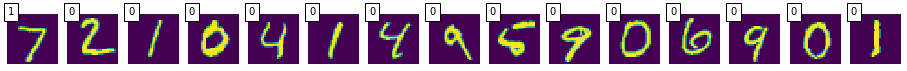

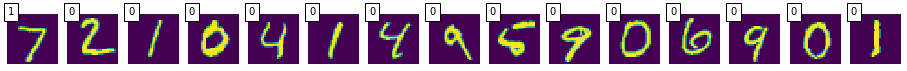

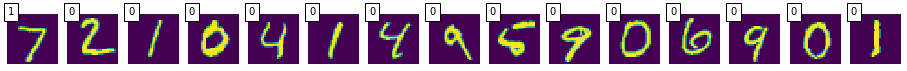

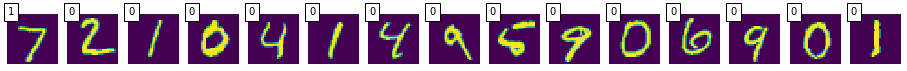

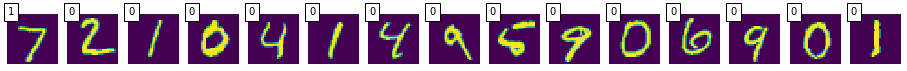

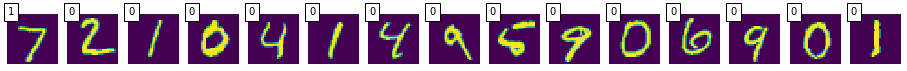

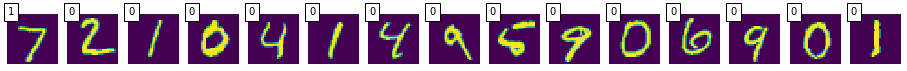

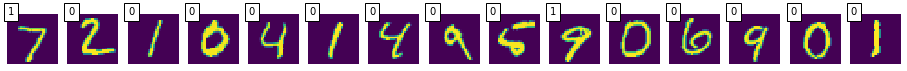

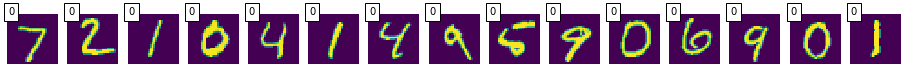

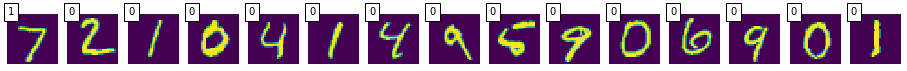

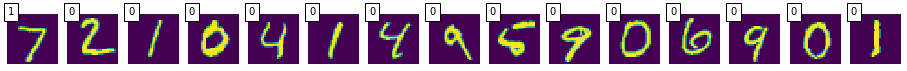

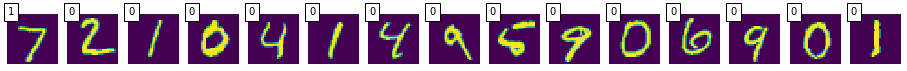

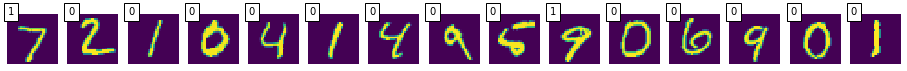

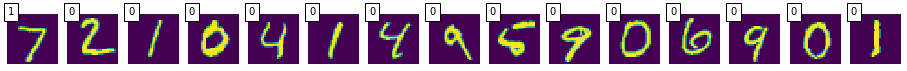

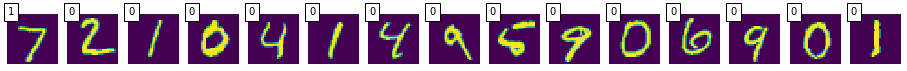

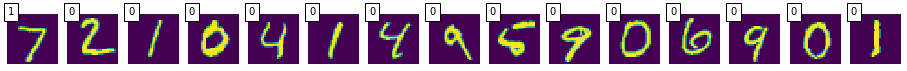

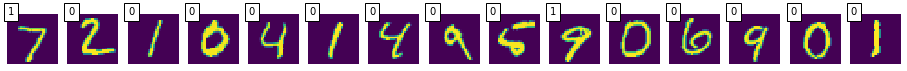

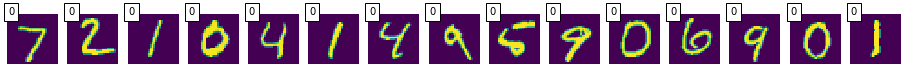

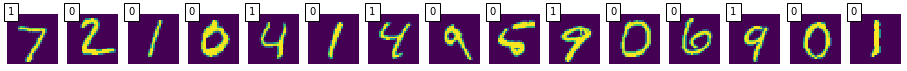

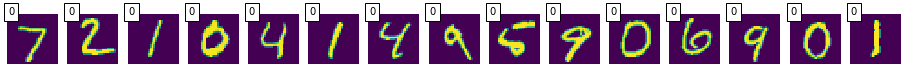

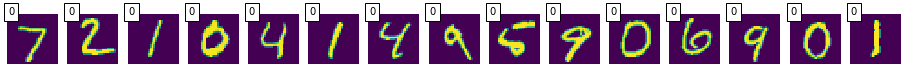

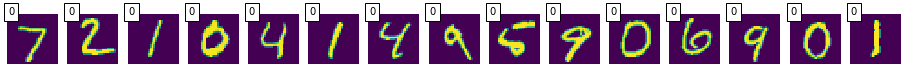

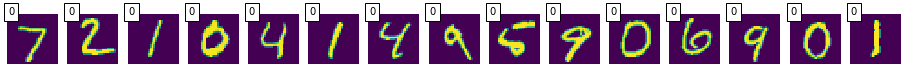

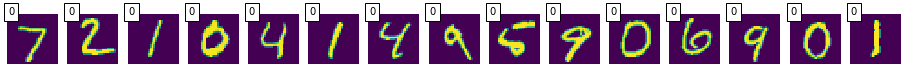

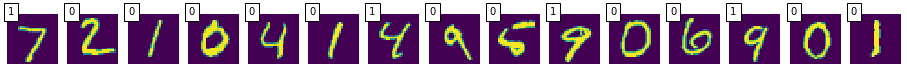

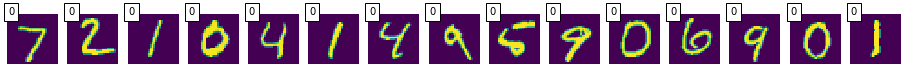

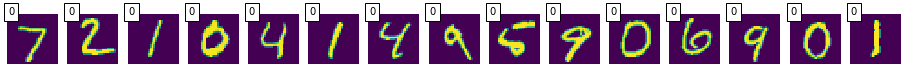

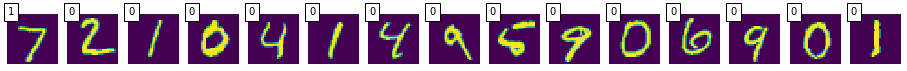

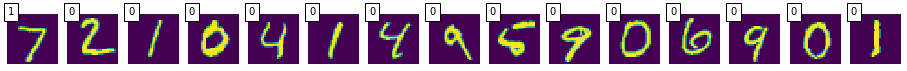

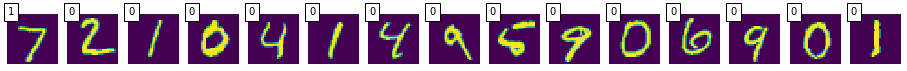

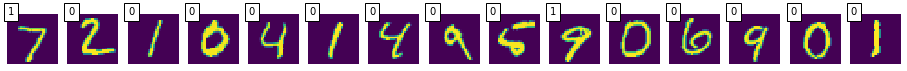

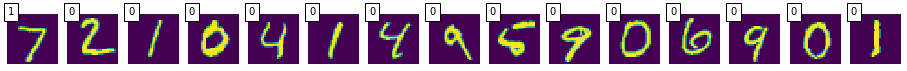

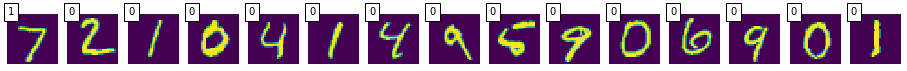

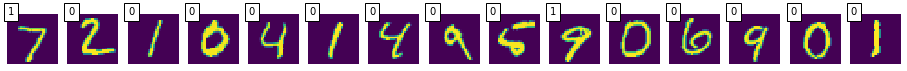

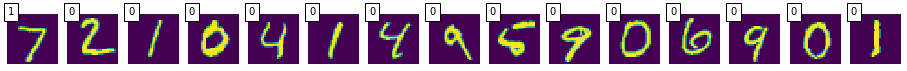

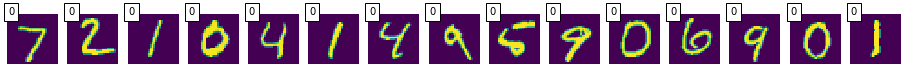

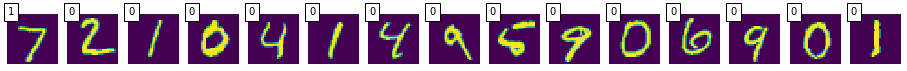

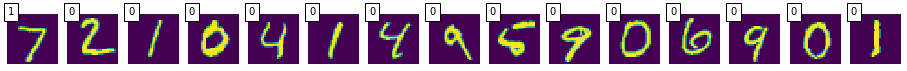

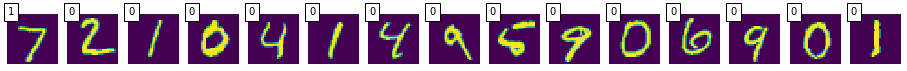

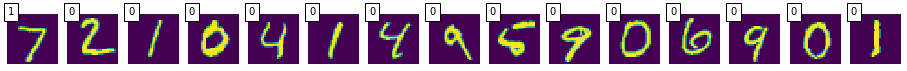

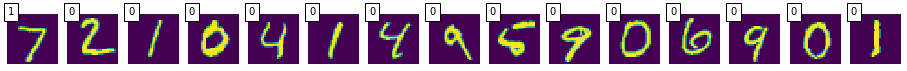

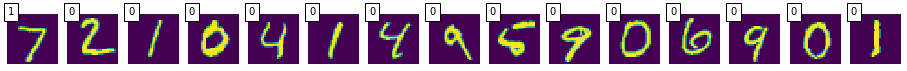

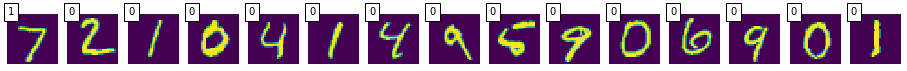

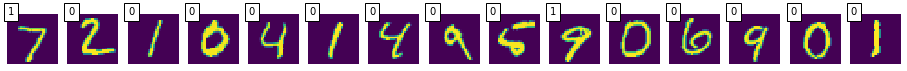

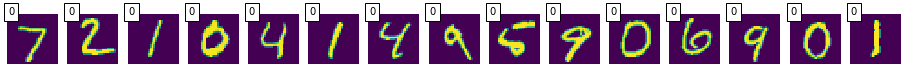

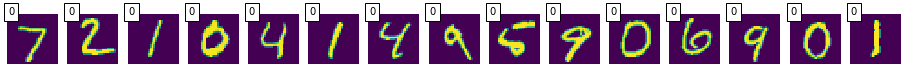

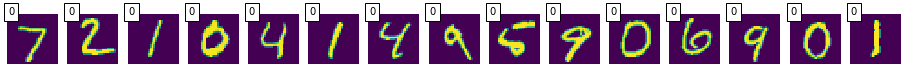

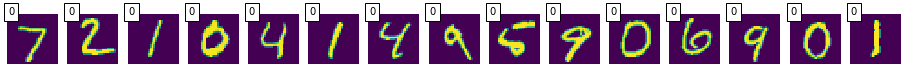

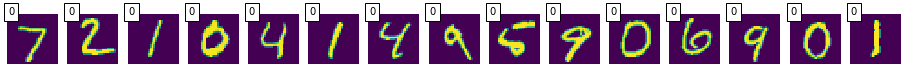

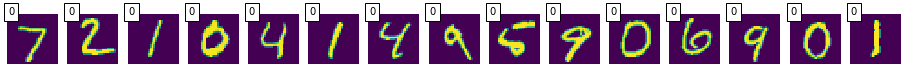

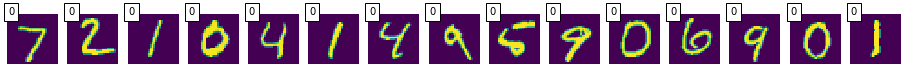

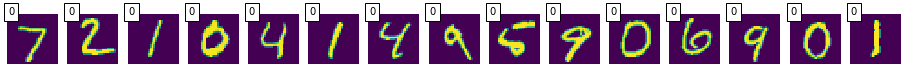

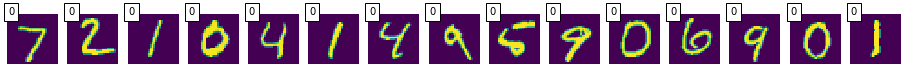

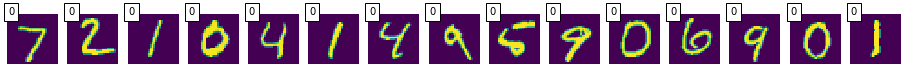

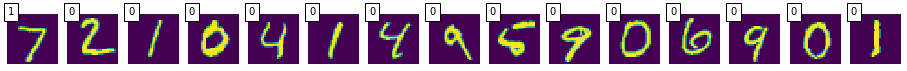

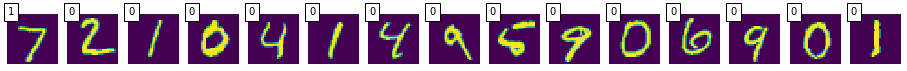

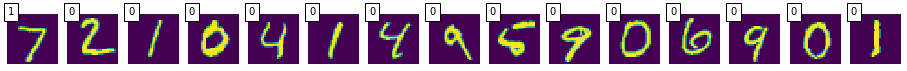

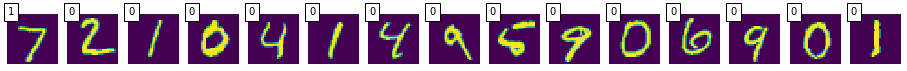

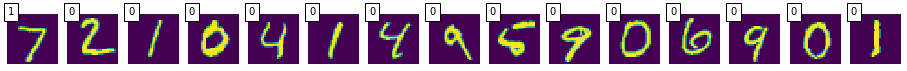

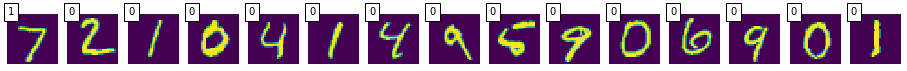

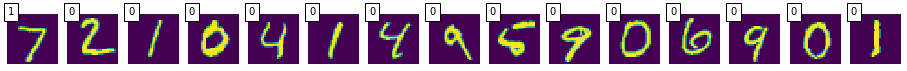

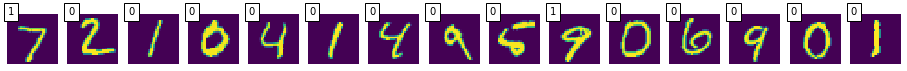

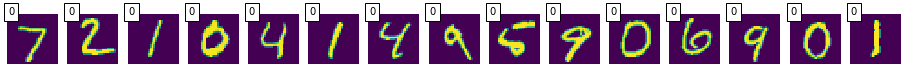

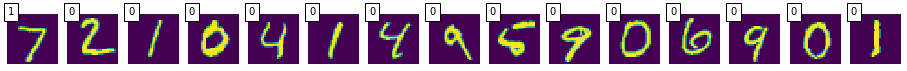

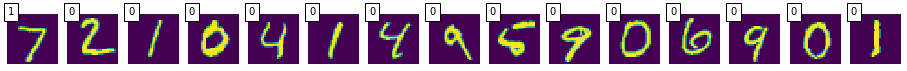

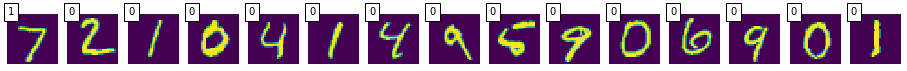

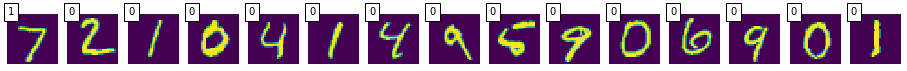

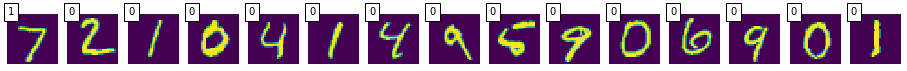

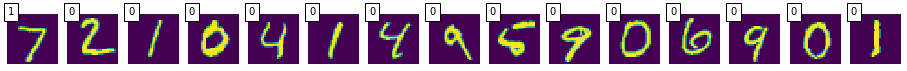

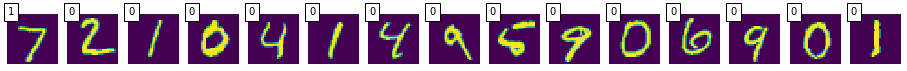

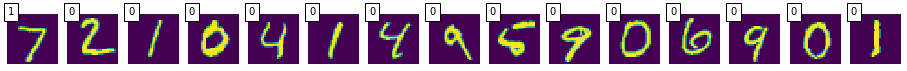

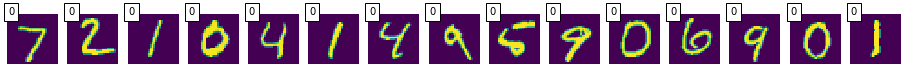

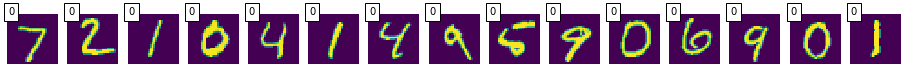

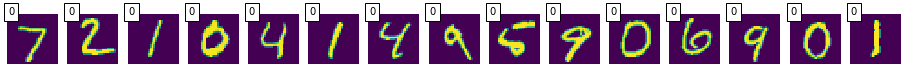

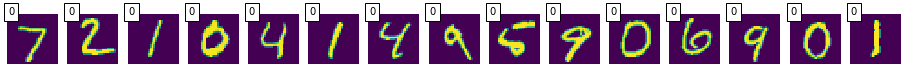

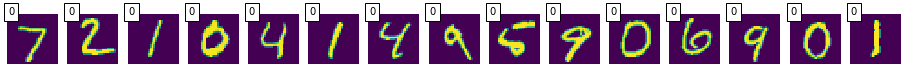

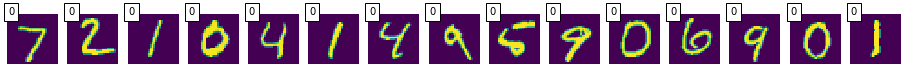

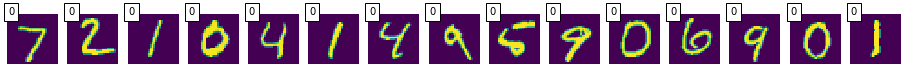

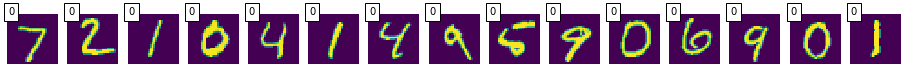

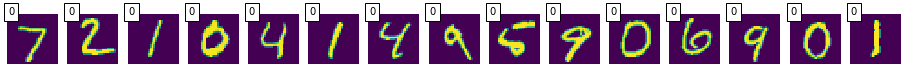

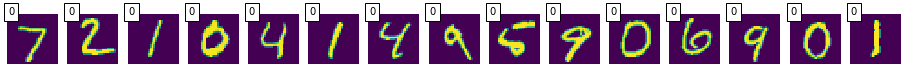

In [53]:
num_conv_list = [1,2,3]
conv_activation_list = ['relu', 'tanh', 'sigmoid']
dense_activation_list = ['relu', 'tanh', 'sigmoid']
num_dense_list = [1,2,3]

for num_conv in num_conv_list:
    for conv_activation in conv_activation_list:
        for dense_activation in dense_activation_list:
            for num_dense in num_dense_list:
                print("-" * 15)
                print("Parameter num_conv : {}, conv_acitvation : {}, dense_activation : {}, num_dense : {}".format(num_conv, conv_activation, dense_activation, num_dense))
                %timeit -n1 -r1 build_model(num_conv = num_conv, conv_activation = conv_activation, num_dense = num_dense, dense_activation  = dense_activation, dropout = True, max_pooling = True)
                
                print("-" * 15)

The best accuracy rate that I have received so far is 98.25%.

For some of these training models, it takes from less than a minute up to past 5 minutes.

For each model, I have changed only 4 parameters. 

#### Question 6 (20% of the grade)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

**Answer 6:**

Train on 20000 samples, validate on 50000 samples
Epoch 1/2
20000/20000 [==============================] - 42s 2ms/step - loss: 1.3857 - accuracy: 0.6076 - val_loss: 0.5906 - val_accuracy: 0.8469
Epoch 2/2
20000/20000 [==============================] - 40s 2ms/step - loss: 0.5946 - accuracy: 0.8199 - val_loss: 0.4227 - val_accuracy: 0.8796
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 0.4227333028125763
Test accuracy: 0.8796399831771851


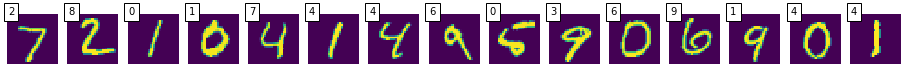

In [61]:
# libraries for extracting some number of random examples
from sklearn.model_selection import train_test_split

# selecting 20,000 examples randomly from X_train
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test))

# this source helps to retain all 10 digits present in our training data
# https://stackoverflow.com/questions/55915442/how-to-creat-a-subset-of-sample-from-original-size-of-mnist-data-while-keeping
# stratify = Y to keep all 10 digits (classes) in our training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=20000)

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# calling build_model on X_train and Y_train
build_model()

#### Question 7 (30% of the grade) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

Train on 20000 samples, validate on 40000 samples
Epoch 1/2
20000/20000 [==============================] - 46s 2ms/step - loss: 2.2009 - accuracy: 0.1893 - val_loss: 2.0383 - val_accuracy: 0.2939
Epoch 2/2
20000/20000 [==============================] - 45s 2ms/step - loss: 1.9901 - accuracy: 0.2914 - val_loss: 1.9088 - val_accuracy: 0.3405
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 1.9088290207862855
Test accuracy: 0.3405250012874603


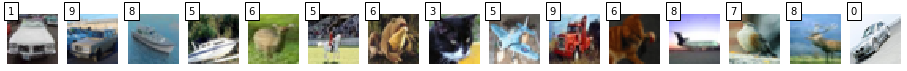

In [70]:
from keras.datasets import cifar10

# selecting 20,000 examples randomly from X_train
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test)) 

# this source helps to retain all 10 digits present in our training data
# https://stackoverflow.com/questions/55915442/how-to-creat-a-subset-of-sample-from-original-size-of-mnist-data-while-keeping
# stratify = Y to keep all 10 digits (classes) in our training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=20000)

# very important for the visualization part
X_test_orig = X_test

img_rows, img_cols = 32, 32

# For some reason, when I commented out the code for normalizing the images
# I got an input error that the model was expecting (32,32,3) dimension of input
# but not (32,32,1) so I changed 1 to 3 here
if K.image_data_format() == 'channels_first':
    shape_ord = (3, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 3)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# calling build_model on X_train and Y_train
build_model()

The test accuracy rate is pretty low. Let's try it with the standard 50 K for training and 10 K for testing.

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 106s 2ms/step - loss: 2.0396 - accuracy: 0.2626 - val_loss: 1.8959 - val_accuracy: 0.3408
Epoch 2/2
50000/50000 [==============================] - 100s 2ms/step - loss: 1.8261 - accuracy: 0.3615 - val_loss: 1.7487 - val_accuracy: 0.3965
1 convolutional layers, 1 dense layers
With max pooling
With dropout
Test score: 1.748749070930481
Test accuracy: 0.39649999141693115


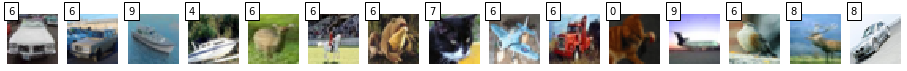

In [72]:
# this source helps to retain all 10 digits present in our training data
# https://stackoverflow.com/questions/55915442/how-to-creat-a-subset-of-sample-from-original-size-of-mnist-data-while-keeping
# stratify = Y to keep all 10 digits (classes) in our training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=50000)

img_rows, img_cols = 32, 32

if K.image_data_format() == 'channels_first':
    shape_ord = (3, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 3)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# calling build_model on X_train and Y_train
build_model()

The accuracy rate improved a little bit but it is still relatively low so I think that there can be improvements to be made.